In [4]:
import sys
import os
#from scipy import *
import scipy as sp
import pylab as pl
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scikits.audiolab as al
import scipy.signal as sig
from scipy.io import wavfile

import signalTools_beta as spT 
#import struct

sys.path.append('/home/florencia/whales/scripts/')

matplotlib.rcParams.update({'font.size': 22})


#import plSpecgrams as pspec

In [1]:
#fileN= '/home/florencia/whales/reports/NLP/manuscript/supplement/wavs/J_f50-6_/WAV_2009-07-13-0050_006-48kHz_100-107sec.wav'
#fileN= '/home/florencia/whales/data/tapes/2009-08-11_0083_001/2009-08-11-WAV_0083_001-48kHz_320-336sec.wav'
#'/home/florencia/whales/data/mySamples/whales/PWcallSet/groupJ/wavs/NPW-021-J-B-090713_f50-3_00_02_18.wav'
fileN = '/home/florencia/whales/data/Vocal-repertoire-catalogue-Pilot-whales-Norway/NPW-56i/2009-07-13-J/NPW-056i-J-A-090713_f50-8_00_02_43.wav'
outDir = '/home/florencia/phd/PhDthesis/thesis/4_call_clf/figures'
#os.path.dirname(os.path.dirname(fileN))
#waveform, sRate, more = al.wavread(fileN)
sRate, waveform = wavfile.read(fileN)

# file managing
baseN = os.path.basename(fileN)
outTemp = os.path.join(outDir, 'spectros', baseN)
print "base name:", baseN, "\nOUT:", outTemp

NameError: name 'wavfile' is not defined

In [7]:
tf = 1.0*(len(waveform))/sRate
ff = sRate/2.0
time = np.arange(0.0, tf, 1.0/sRate)
print len(time), len(waveform), tf, ff

pl.figure(figsize=(10,3))
pl.subplot(121)
pl.title('waveform')
pl.plot(time[:], waveform[:])
pl.xlabel('time [s]')
pl.ylabel('amplitud')
pl.subplot(122)
pl.title('zoom')
pl.plot(time[:], waveform[:], 'b.')
pl.xlabel('time [s]')
pl.ylabel('amplitud')
pl.xlim(0,0.001)

100744 100744 2.09883333333 24000.0


(0, 0.001)

In [9]:
# setings
power = 9

N = 2**power
over = int(N*0.9)
winN = 'hamming'
#winN = 'gaussian'
win =  sig.get_window(winN, N)#
#win = np.hamming(N)
Sr = sRate # just for the units

# spectro
A0 = pl.specgram(waveform, Fs =Sr, NFFT = N, noverlap = over, window = win)[0]
pl.ylim(50,20000)

print "spec shapes:", np.shape(A0[0]), np.shape(A0), A0[0,0], A0[N/2,0]#, np.shape(spec1[0]), np.shape(spec2[0])

baseSpecN = outTemp+'-%d%s%d-new'%(over, winN, power)
print "in:", fileN,"\nout base name:", baseN, baseSpecN


spec shapes: (1928,) (257, 1928) 34598.4151966 0.00524677021711
in: /home/florencia/whales/data/mySamples/whales/PWcallSet/groupJ/wavs/NPW-021-J-B-090713_f50-3_00_02_18.wav 
out base name: NPW-021-J-B-090713_f50-3_00_02_18.wav /home/florencia/whales/data/mySamples/whales/PWcallSet/groupJ/spectros/NPW-021-J-B-090713_f50-3_00_02_18.wav-460hamming9-new


out: /home/florencia/Desktop/test.png


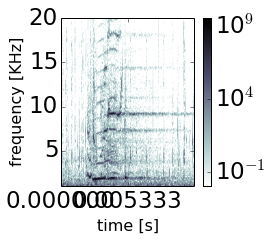

In [28]:
reload(spT)
spT.plspectro(waveform, '/home/florencia/Desktop/test.png', sRate)

In [21]:
# Spectro edditing
v0_cut = 1*1000
vf_cut = 22*1000
A = spT.selectBand(A0, fr_f = sRate/2, v0_cut=v0_cut, vf_cut=vf_cut) # band filter
A = spT.reeScale_E(A, spec_factor=0.99999) # zero the the spectral energy smaller than 0.001% of <E>

out: /home/florencia/whales/data/mySamples/whales/PWcallSet/groupJ/spectros/NPW-021-J-B-090713_f50-3_00_02_18.wav-460hamming9-new-x.pdf 
320 322.09883125


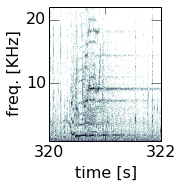

In [25]:
matplotlib.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(int(tf/0.7),ff/10000))
ax = fig.add_subplot(111)
t0 = 320
cax = ax.imshow(np.log(A), extent=[ t0, int(t0+tf), v0_cut/1000., vf_cut/1000.], origin='lower', aspect = 'auto', cmap=pl.cm.bone_r)#, interpolation = 'nearest')

#labels
ax.set_xlabel('time [s]')#, fontsize=24)
ax.set_ylabel('freq. [KHz]')#, fontsize=24)
#ax.tick_params(axis='both')#, labelsize='x-large') 
ax.set_yticks([10, 20])
ax.set_xticks(np.arange(t0, tf+t0, 2))
ax.tick_params(axis = 'both', which = 'major', length = 10)
ax.tick_params(axis = 'both', which = 'minor', length = 7)
ax.set_xticks(np.arange(t0, tf+t0, 1), minor=True)

#cbar
( ll,ml,ul ) = spT.cbarLabels( np.log(A).min(), np.log(A).max() )
#cbar = fig.colorbar(cax, ticks=[ll, ml, ul])
#cbar.ax.set_yticklabels(['10$^{%d}$'%ll,'10$^{%d}$'%ml,'10$^{%d}$'%ul], size='x-large')# vertically oriented colorbar

#save
outF = baseSpecN+'-x.pdf'
fig.savefig(outF, bbox_inches='tight')
print "out:", outF, "\n", t0, t0+tf

In [33]:
fig = pl.figure(figsize=(10,3))
ax = fig.add_subplot(111)
cax = ax.imshow(np.log10(A), extent=[ 0, tf, 0, ff/1000], origin='lower', interpolation = 'nearest', aspect = 'auto', cmap=pl.cm.gray_r)

#labels
pl.xlabel('time [s]')
pl.ylabel('frequency [KHz]')

#cbar
( ll,ml,ul ) = spT.cbarLabels( np.log10(A0).min(), np.log10(A0).max() )
cbar = fig.colorbar(cax, ticks=[ll, ml, ul])
cbar.ax.set_yticklabels(['10$^{%d}$'%ll,'10$^{%d}$'%ml,'10$^{%d}$'%ul], size='x-large')# vertically oriented colorbar


#pl.xlim(0,16)
#pl.ylim(1,20)

outF = baseSpecN+'-bwSpec.eps'
#pl.savefig(outF)
print "out:", outF

out: /home/florencia/whales/data/tapes/2009-08-11_0083_001/2009-08-11-WAV_0083_001-48kHz_320-336sec-460hamming9-new-bwSpec.eps


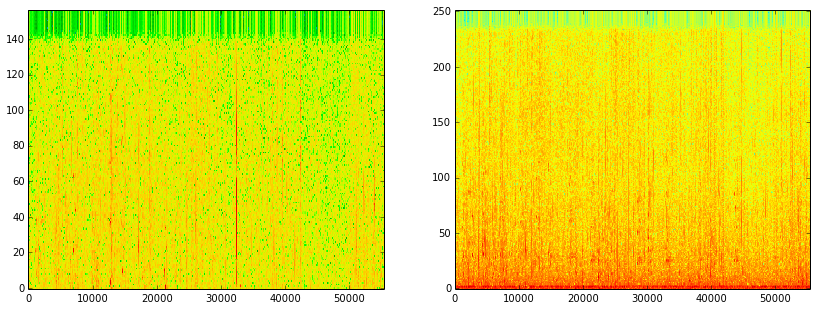

In [7]:
fig = pl.figure(figsize=(14,5))
ax = fig.add_subplot(121)
cax = ax.imshow(np.log10(A)[100:], origin='lower', interpolation = 'nearest', aspect = 'auto', cmap=pl.cm.spectral)
ax = fig.add_subplot(122)
cax = ax.imshow(np.log10(A)[5:], origin='lower', interpolation = 'nearest', aspect = 'auto')#, cmap=pl.cm.RdBu)



In [7]:
execfile("plWavSpectro.py")

SystemExit: 2

usage: -c [-h] [-o OVERLAP] [-w WINPOW] [-s SAVEDAT] [-f0 FREC0] [-ff FRECF]
          [-e FIGEXT]
          wavFN
-c: error: ambiguous option: -f could match -ff, -f0
To exit: use 'exit', 'quit', or Ctrl-D.


In [8]:
help(spT)

Help on module signalTools_beta:

NAME
    signalTools_beta

FILE
    /home/florencia/whales/scripts/signal-processing/signalTools_beta.py

FUNCTIONS
    allPositive_andNormal(M)
        normalizes the matrices, so that all it's values lay in (0,1)
    
    cbarLabels(minV, maxV)
        give me the maximum and the minimum values of color bar and I will retun 3 label
        the lables returned are int type. ment for exponents.
    
    cbarLabels_f(minV, maxV)
        give me the maximum and the minimum values of color bar and I will retun 3 labels
        the lables returned are float type
    
    myBinarize(rawData, Nbits=7)
        This function binarizes a matix preserving the number of columns (time wins)
    
    plspectro(waveform, outF, sRate, N=512, v0_cut=1000, vf_cut=20000, overFrac=0.5, winN='hanning')
    
    reeScale_E(M, spec_factor=0.3333333333333333)
        Zeroes the noise by taking only the part of the spectrum with the higest energy.
        * M, log (spectrogra

## Plot calls

In [35]:
fileN = "/home/florencia/whales/NLP/NPWvocalRepertoire/wPandas/all_sounds/NPWVR-seqsData.csv"
outD = os.path.dirname(fileN) #fileN.

datB0 = pd.read_csv(fileN)
colNames = datB0.columns
groups = list(set( datB0.group.values))
print len(datB0), colNames, groups, "\n", outD
datB0.head(n=3)

6586 Index([u'wav_file', u'call', u'date', u'group', u'quality', u'recording', u'time_stamp', u'wavF_index', u'whale_type', u'timeSs', u'old_group'], dtype='object') ['B', 'D', 'G', 'F', 'H', 'J'] 
/home/florencia/whales/NLP/NPWvocalRepertoire/wPandas/all_sounds


,wav_file,call,date,group,quality,recording,time_stamp,wavF_index,whale_type,timeSs,old_group
0,NPW-140-B-B-100703_f124-1_00_04_02.wav,140,100703,J,B,f124-1_,00_04_02,184,NPW,242,B
1,NPW-140-B-C-100703_f124-1_00_05_56.wav,140,100703,J,C,f124-1_,00_05_56,185,NPW,356,B
2,NPW-140-B-D-100703_f124-1_00_07_50.wav,140,100703,J,D,f124-1_,00_07_50,186,NPW,470,B


#### Create list of files to plot

In [36]:
# settings
tape = 'f83-1_'
t0 = 5*60 + 20
tf = t0 + 16 

# tape selection
thisDB = datB0.loc[datB0.recording == tape]
print max(thisDB.timeSs), min(thisDB.timeSs), len(thisDB), "t:(%d, %d)"%(t0, tf)
#thisDB.sort_index(by = 'timeSs')

datB_sel = thisDB.loc[ (thisDB.timeSs > t0) & (thisDB.timeSs < tf) ]# & ]
fiLi = datB_sel.wav_file.values
print len(datB_sel), fiLi

574 20 100 t:(320, 336)
6 ['NPW-056ii-D-B-090811_f83-1_00_05_35.wav'
 'NPW-056ii-D-B-090811_f83-1_00_05_32.wav'
 'NPW-056ii-D-B-090811_f83-1_00_05_22.wav'
 'NPW-020-D-C-090811_f83-1_00_05_29.wav'
 'NPW-020-D-B-090811_f83-1_00_05_21.wav'
 'NPW-020-D-C-090811_f83-1_00_05_34.wav']


In [70]:
#plot settings
def plSpectro(fileN, plName = ''):

    sRate, waveform = wavfile.read(fileN)
    tf = 1.0*(len(waveform)-0.1)/sRate
    ff = sRate/2.0

    # file managing
    baseN = os.path.splitext(fileN)[0]

    # spectro
    A0 = pl.specgram(waveform, Fs =Sr, NFFT = N, noverlap = over, window = win)[0]
    #pl.ylim(50,20000)

    baseSpecN = baseN+'-%d%s%d'%(over, winN, power)
    print "in:", fileN,"\nout base name:", baseN

    # Spectro edditing
    v0_cut = 1*1000
    vf_cut = 22*1000
    A = spT.selectBand(A0, fr_f = sRate/2, v0_cut = v0_cut, vf_cut = vf_cut) # band filter
    A = spT.reeScale_E(A, spec_factor = 0.9999) # zero the the spectral energy smaller than 0.001% of <E>
    matplotlib.rcParams.update({'font.size': 21})
    fig = plt.figure(figsize=(int(tf/0.7),ff/10000))

    ax = fig.add_subplot(111)
    cax = ax.imshow(np.log(A), extent=[ 0, tf, v0_cut/1000., vf_cut/1000.], origin='lower', aspect = 'auto', cmap = pl.cm.bone_r)#, interpolation = 'nearest')

    #labels
    #ax.set_xlabel('time [s]')
    ax.set_yticks([10, 20])
    #ax.set_yticklabels([])
    ax.set_ylabel('freq. [KHz]')
    ax.set_xticks(np.arange(0, tf, 1.0))
    if plName: ax.set_title(plName)
    
    #save
    outF = baseSpecN+'-x.pdf'
    fig.savefig(outF, bbox_inches='tight')
    print "out:", outF 


In [69]:
dirN = '/home/florencia/whales/data/tapes/2009-08-11_0083_001/'

for fi in fiLi[:]:
    plSpectro(dirN+fi)#, plName=fi)

in: /home/florencia/whales/data/tapes/2009-08-11_0083_001/NPW-056ii-D-B-090811_f83-1_00_05_35.wav 
out base name: /home/florencia/whales/data/tapes/2009-08-11_0083_001/NPW-056ii-D-B-090811_f83-1_00_05_35
out: /home/florencia/whales/data/tapes/2009-08-11_0083_001/NPW-056ii-D-B-090811_f83-1_00_05_35-460hamming9-presentation.pdf
in: /home/florencia/whales/data/tapes/2009-08-11_0083_001/NPW-056ii-D-B-090811_f83-1_00_05_32.wav 
out base name: /home/florencia/whales/data/tapes/2009-08-11_0083_001/NPW-056ii-D-B-090811_f83-1_00_05_32
out: /home/florencia/whales/data/tapes/2009-08-11_0083_001/NPW-056ii-D-B-090811_f83-1_00_05_32-460hamming9-presentation.pdf
in: /home/florencia/whales/data/tapes/2009-08-11_0083_001/NPW-056ii-D-B-090811_f83-1_00_05_22.wav 
out base name: /home/florencia/whales/data/tapes/2009-08-11_0083_001/NPW-056ii-D-B-090811_f83-1_00_05_22
out: /home/florencia/whales/data/tapes/2009-08-11_0083_001/NPW-056ii-D-B-090811_f83-1_00_05_22-460hamming9-presentation.pdf
in: /home/floren

In [71]:
fi = '/home/florencia/whales/data/tapes/2009-08-11_0083_001/NPW-020-D-B-090811_f83-1_00_05_21.wav' 
plSpectro(fi)#, plName=fi)

in: /home/florencia/whales/data/tapes/2009-08-11_0083_001/NPW-020-D-B-090811_f83-1_00_05_21.wav 
out base name: /home/florencia/whales/data/tapes/2009-08-11_0083_001/NPW-020-D-B-090811_f83-1_00_05_21
out: /home/florencia/whales/data/tapes/2009-08-11_0083_001/NPW-020-D-B-090811_f83-1_00_05_21-460hamming9-presentation.pdf


In [30]:
f = lambda x: x
f(2)

2

In [31]:
type(f)

function

In [3]:
import pylotwhale.signalProcessing.signalTools as sT
import pylotwhale.utils.plotTools as plT
reload(plT)

<module 'pylotwhale.utils.plotTools' from '/home/florencia/whales/scripts/pylotwhale/pylotwhale/utils/plotTools.py'>

In [ ]:
for wavF in 
plT.plspectro()